Imports libraries


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt


Loads and processes data

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


Building neural network

In [ ]:
inputs = keras.Input(shape=(32,32,3))
x = layers.Conv2D(32, (3,3), activation = "relu", input_shape=(32,32,3))(inputs)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2,2)(x)

x = layers.Conv2D(64, (3,3), activation = "relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2,2)(x)

x = layers.Conv2D(128, (3,3), activation = "relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2,2)(x)

x = layers.Flatten()(x)
x = layers.Dense(3000, activation = "relu")(x)
x = layers.Dense(1000, activation = "relu")(x)

outputs = layers.Dense(10, activation = "softmax")(x)






In [ ]:
#Save the model

model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")


Compile, Train and Evaluate the model






Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_3 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 13, 13, 64)       

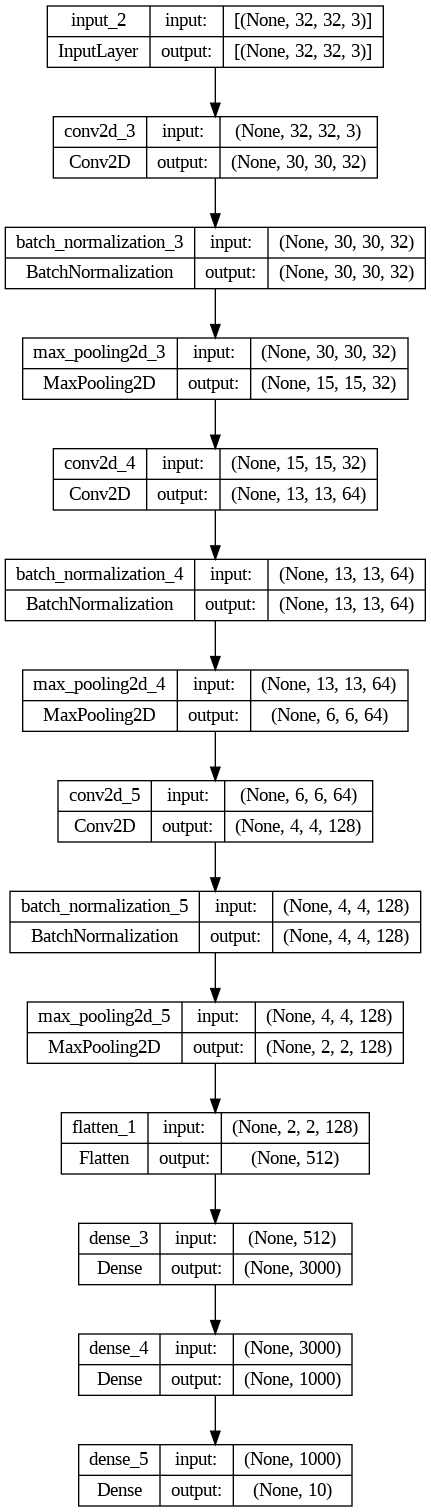

In [ ]:
print(model.summary())

keras.utils.plot_model(model, "my_first_CNN.png", show_shapes=True)

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=10,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
)

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)

Fit model on training data
Epoch 1/10
782/782 [==============================] - 141s 179ms/step - loss: 1.3135 - sparse_categorical_accuracy: 0.5452
Epoch 2/10
782/782 [==============================] - 136s 174ms/step - loss: 0.8933 - sparse_categorical_accuracy: 0.6929
Epoch 3/10
782/782 [==============================] - 136s 174ms/step - loss: 0.7270 - sparse_categorical_accuracy: 0.7526
Epoch 4/10
782/782 [==============================] - 136s 173ms/step - loss: 0.6187 - sparse_categorical_accuracy: 0.7912
Epoch 5/10
782/782 [==============================] - 137s 175ms/step - loss: 0.5381 - sparse_categorical_accuracy: 0.8203
Epoch 6/10
782/782 [==============================] - 136s 174ms/step - loss: 0.4713 - sparse_categorical_accuracy: 0.8438
Epoch 7/10
782/782 [==============================] - 138s 176ms/step - loss: 0.4225 - sparse_categorical_accuracy: 0.8643
Epoch 8/10
782/782 [==============================] - 136s 173ms/step - loss: 0.3800 - sparse_categorical_accura

In [ ]:
classes = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "truck"]
y_test = y_test.reshape(-1,)

def Plot_Sample(x, y, index):

  Predict = model.predict(x[index])

  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[Predict])

  print("This is the real category")
  classes[y[index]]

Test the new Model (Incomplete)


3/3 [==============================] - 0s 20ms/step


TypeError: ignored

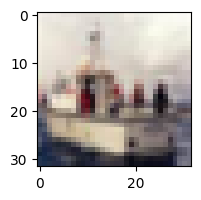

In [ ]:
Plot_Sample(x_test, y_test, 88)


InvalidArgumentError: ignored

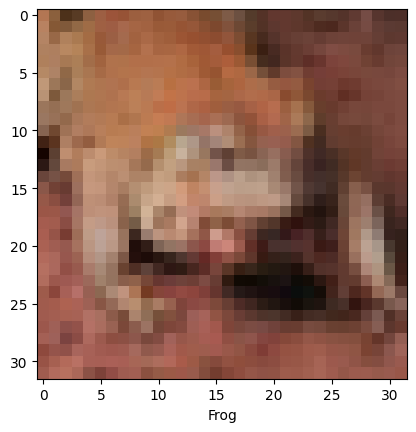

In [ ]:
y_test = y_test.reshape(-1,)

classes = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "truck"]
plt.imshow(x_test[5])
plt.xlabel(classes[y_test[5]])


#Predict = model.predict(x_test[5])
predictions
